# Ensemble Learning Exercise

## 1. Implementing Random Forest From Scratch (30 points)
In this exercise you will need to implement a simple version of Random Forest Regressor from scratch. Your model will handle **continuous input and output**. 

1.1. Compelete the skeleton class below (you should use scikit-learn's `DecisionTreeRegressor` model that the `TreeEnsemble` will use)
- 'X' is a matrix of data values (rows are samples, columns are attributes)
- `y` is a vector of corresponding target values
- `n_trees` is the number of trees to create
- `sample_sz` is the size of the sample set to use of each of the trees in the forest (chose the samples randomly, with or without repetition)
- `n_features` is the size of features to sample. This can be a natrual number > 0, or a ratio of the features as a number in range (0,1]
- `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  

1.2. The `predict` function will use mean of the target values of the trees. The result is a vector of predictions matching the number of rows in `X`.

1.3. The `oob_mse` function will compute the mean squared error over all **out of bag (oob)** samples. That is, for each sample calculate the squared error using  predictions from the trees that do not contain x in their respective bootstrap sample, then average this score for all samples. See:  [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

1.4. To check your random forest implementation, use the boston dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
 


## Load data and import stuff

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Boston Housing dataset
boston = load_boston()

# Convert the dataset to a DataFrame
X = boston.data

# Add the target variable (median value of the houses) to the DataFrame
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## IMPLEMENT FOREST

In [46]:

class TreeEnsemble():
    def __init__(self, X, y, n_trees, sample_sz, n_features, min_leaf):
        self.samples = X
        self.targets = y
        self.n_trees = n_trees 
        self.sample_sz =  sample_sz
        if isinstance(n_features,float): ## converts percentage to number of features
            self.n_features =  int(n_features *  X.shape[1])
        else:
            self.n_features = n_features
        self.min_leaf = min_leaf
        self.trees = [] # List holding all the trees.
        self.oob_scores = [] # List holding OOB score for each tree, used to calculate oob_mse.
        self.create_trees()


    def create_trees(self):
        
        for i in range(self.n_trees): # loop creating n_trees

            # partition data by rows and features (in bag data)
            ib_X,ib_y,oob_X,oob_y = self.bootstrap(i) # ib = in_bag

            # generate tree
            tree = DecisionTreeRegressor(random_state = i ,min_samples_leaf=self.min_leaf) 
            tree.fit(ib_X, ib_y) 
            self.trees.append(tree)
            
            # calculate oob_error and append oob_scores list
            self.oob_scores.append(((tree.predict(oob_X) - oob_y)**2).mean())
           
        
    def bootstrap(self,i):
        np.random.seed(i)
        rows = np.random.choice(self.samples.shape[0], self.sample_sz, replace=False)
        oob_idx = np.setdiff1d(np.arange(self.samples.shape[0]), rows)
        cols = np.random.choice(self.samples.shape[1], self.n_features, replace=False)
        ib_y = self.targets[rows]
        ib_X = self.samples[rows, :][:, cols]
        
        oob_X = self.samples[oob_idx, :][:, cols]
        oob_y = self.targets[oob_idx]
        return ib_X, ib_y, oob_X, oob_y

        

    def predict(self, X):    
        predictions = []
        for i in range(self.n_trees):
            predictions.append(self.trees[i].predict(X[self.trees[i]]))
        return np.mean(predictions, axis=0)
  


    def oob_mse(self):
        return np.mean(self.oob_scores)



In [45]:
best_mse = np.inf
best_hyper = []

for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for n_features in [3,5,10]:
      for min_leaf in [1,5]:
        forest = TreeEnsemble(X, y, n, sz, n_features,min_leaf)
        mse = forest.oob_mse()        
        if best_mse > mse:
          best_mse = mse
          best_hyper = [n,sz,n_features,min_leaf]

print(best_hyper)
print(best_mse)

[1, 500, 3, 5]
4.830558352229778


In [47]:
forest = TreeEnsemble(X,y,*best_hyper)
y_hat = forest.predict(X)  # forest is the chosen model
plt.scatter(y_hat, y)
print(np.mean((y_hat - y)**2))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## FOREST WITH NP

## 2. Implementing AdaBoost From Scratch (30 points)


2.1.   Implement the AdaBoost algorithm for classification task. Your `AdaBoost` class should receive a method for creating a weak learner, which has a fit and predict methods (simulate re-weighting of the samples by an appropriate re-sampling of the train set).

2.2.   Use your model to find a strong classifier on the sample set given below, using $n$ weak learners:

2.2.1. For the base weak learners, use any classifier you want (check different types with different configuration, keep them simple = Weak). 

2.2.2. Split the sample set into train and test sets.

2.2.3 Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, and visualize the final iteration weights of the samples in those plots.
    - How does the overall train set accuracy changes with $n$?
    - Does you model starts to overfit at some point?





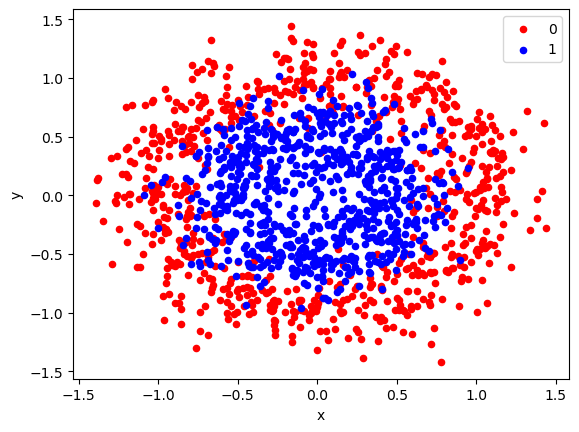

In [98]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
y[y==0] = -1

Accuracy: 0.8181818181818182


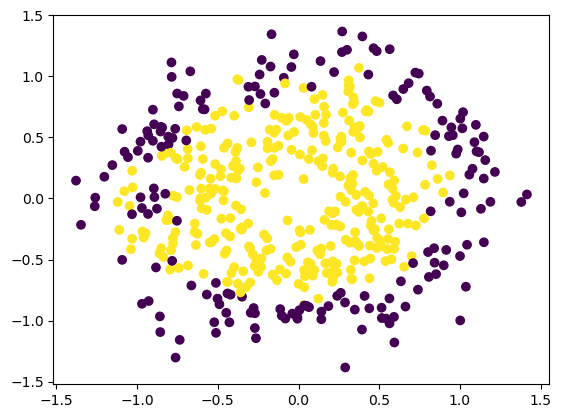

In [149]:
import numpy as np

class AdaBoostKNN:
    def __init__(self, weak_learner, n_learners):
        self.weak_learner = weak_learner
        self.n_learners = n_learners
        self.alphas = []
        self.learners = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples
        for i in range(self.n_learners):
            learner = self.weak_learner()
            learner.weights = self.gen_weights
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_resampled = X[indices]
            y_resampled = y[indices]
            learner.fit(X_resampled , y_resampled)
            y_pred = learner.predict(X)
            e = np.sum(w[y != y_pred])
            alpha = 0.5 * np.log((1 - e) / e)
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)
            self.alphas.append(alpha)
            self.learners.append(learner)
    
    def gen_weights(self,w):
        return w
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for alpha, learner in zip(self.alphas, self.learners):
            y_pred += alpha * learner.predict(X)
        return np.sign(y_pred)

def create_weak_learner():
    return KNeighborsClassifier(n_neighbors=1)

model = AdaBoost(create_weak_learner, n_learners=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.show()



Accuracy: 0.501010101010101


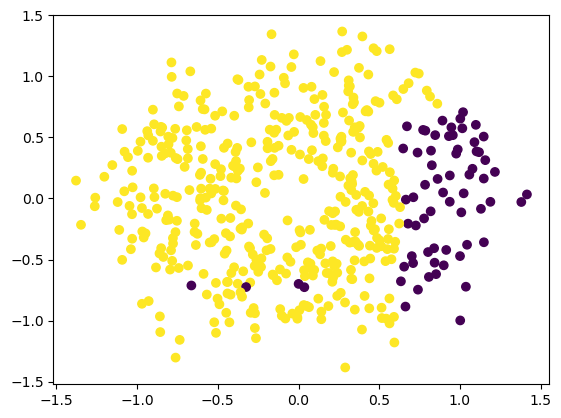

In [156]:
import numpy as np

class AdaBoostTree:
    def __init__(self, n_learners):
       
        self.n_learners = n_learners
        self.alphas = []
        self.learners = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples
        for i in range(self.n_learners):
            learner = DecisionTreeClassifier(max_depth=1)
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_resampled = X[indices]
            y_resampled = y[indices]
            learner.fit(X_resampled , y_resampled,sample_weight=w)
            y_pred = learner.predict(X)
            e = np.sum(w[y != y_pred])
            alpha = 0.5 * np.log((1 - e) / e)
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)
            self.alphas.append(alpha)
            self.learners.append(learner)

    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for alpha, learner in zip(self.alphas, self.learners):
            y_pred += alpha * learner.predict(X)
        return np.sign(y_pred)


model = AdaBoostTree(n_learners=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.show()



## 3. Boosting Trees from Scratch (40 points)
1. Use the scikit-learn's DecisionTreeRegressor (again :) with `max_depth = 1` (stumps)  to write a L2Boost model which minimize the L2 square loss iteration by iteration.
Reminder: in each step, build a decision tree to minimize the error between the true label and the accumulated (sum) of the previous step predictions.
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)
2. Use the Boston dataset to plot the MSE as a function of the number of trees for a logspace of `n_trees` up to 1,000. What is the optimal value of `n_trees`? of learning rate?
3. Compare the performance with a deep DecisionTreeRegressor (find the optimal `max_depth`).  Who wins?
4. Add an early-stopping mechanisim to the GBTL2 model to use a validation set to detect over-fit.